In [44]:
#library imports

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.colors as cs
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#read in data

df = pd.read_csv('./movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Identify missing data as %

print(round(100*df.isna().mean(),2))

#drop rows with missing data

df = df.dropna()

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64


In [5]:
#Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#change revenue and budget to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
#create correct year column and release location from released column

df['year_correct'] = df['released'].apply(lambda x: x.split('(')[0].split(',')[-1].strip()[-4:])
df['release_location'] = df['released'].apply(lambda x: x.split('(')[-1].replace(')',''))

In [111]:
df = df.sort_values(by = 'gross', inplace = False, ascending = False)

In [24]:
# drop duplicates

df.drop_duplicates(inplace = True)

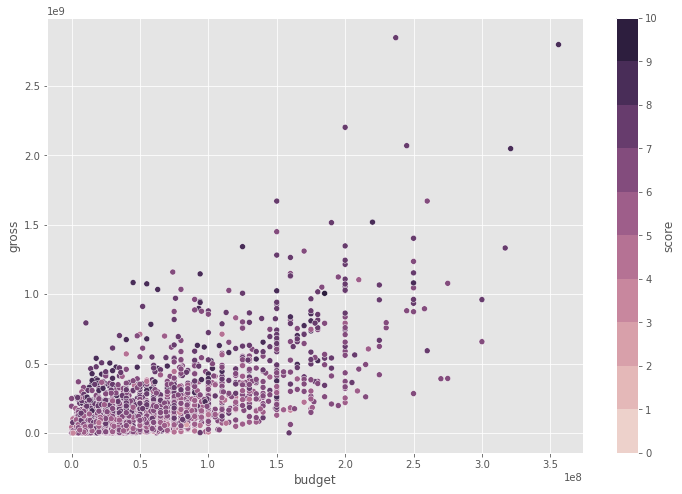

In [50]:
#relational plot of budget v gross showing score as hue

cmap = sns.cubehelix_palette(as_cmap=True)
norm = cs.BoundaryNorm(np.arange(0,11,1), cmap.N)
ax = sns.scatterplot(data = df, x = 'budget', y = 'gross', hue = 'score', hue_norm = norm, cmap = cmap)
#norm = plt.Normalize(df['score'].min(), df['score'].max())

sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])

ax.get_legend().remove()
plt.colorbar(sm, ax = ax, label = 'score', ticks = np.arange(0,11,1))


<AxesSubplot:xlabel='budget', ylabel='gross'>

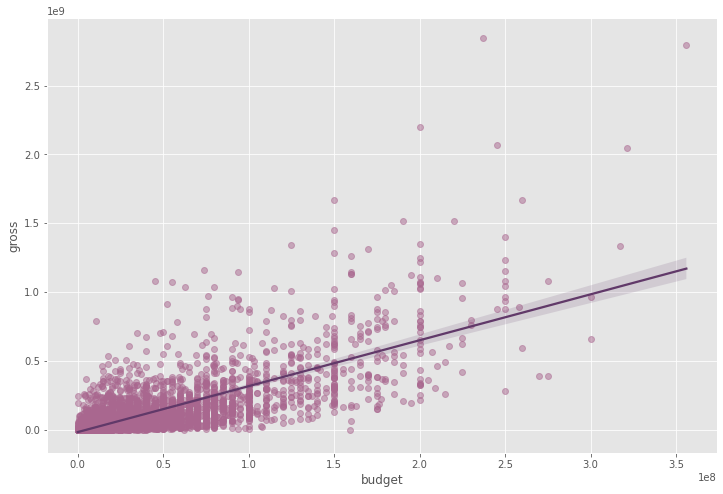

In [68]:
#scatterplot of budget v gross (linear)

sns.regplot(data = df, x = 'budget', y = 'gross',
            scatter_kws={'color': sns.cubehelix_palette(as_cmap=True)(.5), 'alpha': .5},
            line_kws={'color': sns.cubehelix_palette(as_cmap=True)(.8)},
            )

<AxesSubplot:xlabel='budget', ylabel='gross'>

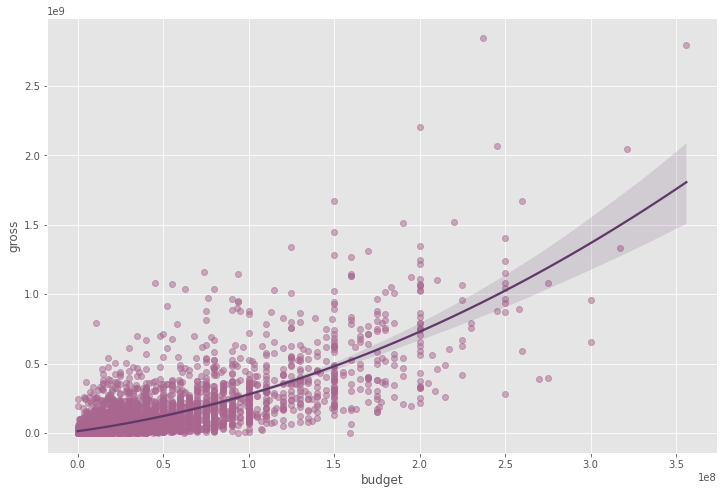

In [69]:
#scatterplot of budget v gross (non-linear)

sns.regplot(data = df, x = 'budget', y = 'gross', order=2,
            scatter_kws={'color': sns.cubehelix_palette(as_cmap=True)(.5), 'alpha': .5},
            line_kws={'color': sns.cubehelix_palette(as_cmap=True)(.8)},
            )

In [93]:
#correlations
#high correlation between budget and gross is confirmed

cors = df.corr(method = 'pearson')


Text(0.5, 1.0, 'Correlation Matrix for numeric movie statistics')

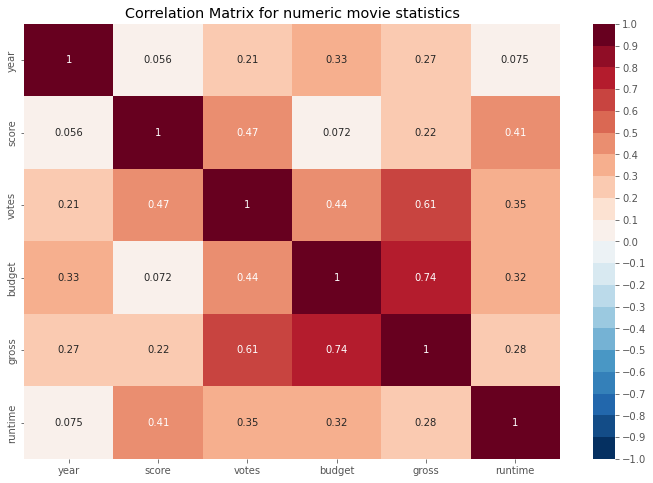

In [109]:
#cmap = sns.diverging_palette(220, 10, sep=80, n=20, as_cmap=True)
cmap = plt.cm.RdBu_r
norm = cs.BoundaryNorm(np.arange(-1,1.1,.1), cmap.N)
ax = sns.heatmap(cors, cmap=cmap, norm=norm, cbar_kws={'ticks': np.arange(-1,1.1,0.1)}, annot = True)
ax.set_title("Correlation Matrix for numeric movie statistics")


In [112]:
# make Company numeric category

def convert_to_category(col):
    if col.dtype == 'object':
        return col.astype('category').cat.codes
    return col
        
df_numeric = df.apply(convert_to_category, axis = 0)

[Text(0.5, 1.0, 'Highest grossing companies'), Text(0, 0.5, '')]

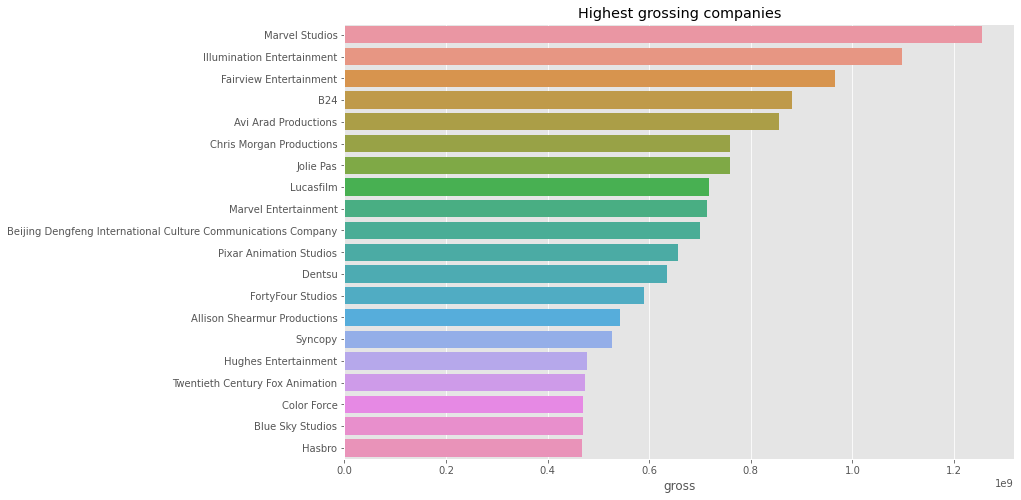

In [154]:
#marvel studios highest avg gross of all companies

top20_gross_companies = df.groupby('company').mean().sort_values('gross',ascending=False).head(20)
ax = sns.barplot(y= top20_gross_companies.index, x= top20_gross_companies['gross'])
ax.set(title = 'Highest grossing companies', ylabel = '')


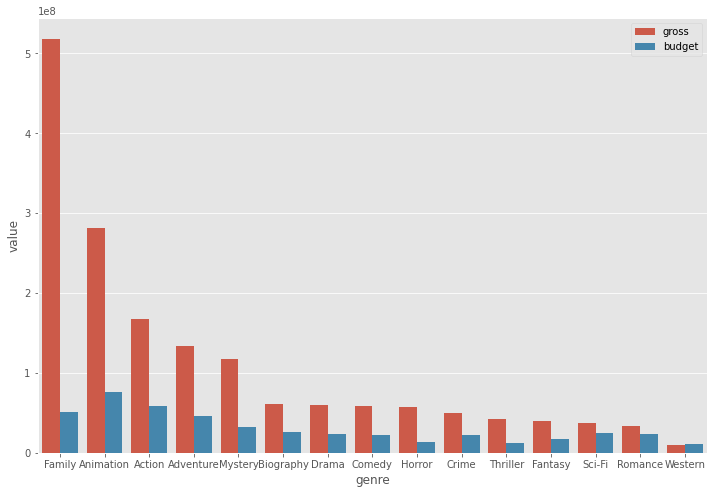

In [178]:
#Family has highest gross but animation has the highest budget

genre_gross = df.groupby('genre').mean().sort_values('gross',ascending=False)
genre_gross.reset_index(inplace=True)

df_plot = pd.melt(genre_gross[['genre','gross','budget']],id_vars = 'genre').rename(columns={"variable":"money_type"})

ax = sns.barplot(x = 'genre', y='value', 
               hue = 'money_type',data=df_plot)
ax.get_legend().set_title('')